# ELUC Data Exploration

In [ ]:
# %pip install zarr
# %pip install regionmask
# %pip install xgboost
# %pip install scikit-learn

In [1]:
import numpy as np
import pandas as pd
import regionmask
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
dataset = xr.open_zarr("processed/merged_aggregated_dataset_1850_2022.zarr.zip", consolidated=True)

In [3]:
dataset

<xarray.Dataset>
Dimensions:         (time: 173, lat: 671, lon: 1440)
Coordinates:
  * lat             (lat) float32 83.38 83.12 82.88 ... -89.38 -89.62 -89.88
  * lon             (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
    mask            (lon, lat) int8 dask.array<chunksize=(45, 45), meta=np.ndarray>
  * time            (time) int32 1850 1851 1852 1853 ... 2019 2020 2021 2022
Data variables: (12/28)
    ELUC            (time, lat, lon) float32 dask.array<chunksize=(173, 45, 45), meta=np.ndarray>
    ELUC_diff       (time, lat, lon) float32 dask.array<chunksize=(173, 45, 45), meta=np.ndarray>
    c3ann           (time, lat, lon) float32 dask.array<chunksize=(173, 45, 45), meta=np.ndarray>
    c3ann_diff      (time, lat, lon) float32 dask.array<chunksize=(173, 45, 45), meta=np.ndarray>
    c3nfx           (time, lat, lon) float32 dask.array<chunksize=(173, 45, 45), meta=np.ndarray>
    c3nfx_diff      (time, lat, lon) float32 dask.array<chunksize=(173, 45, 45), meta=np.ndarray>
    ...              ...
    secdf           (time, lat, lon) float32 dask.array<chunksize=(173, 45, 45), meta=np.ndarray>
    secdf_diff      (time, lat, lon) float32 dask.array<chunksize=(173, 45, 45), meta=np.ndarray>
    secdn           (time, lat, lon) float32 dask.array<chunksize=(173, 45, 45), meta=np.ndarray>
    secdn_diff      (time, lat, lon) float32 dask.array<chunksize=(173, 45, 45), meta=np.ndarray>
    urban           (time, lat, lon) float32 dask.array<chunksize=(173, 45, 45), meta=np.ndarray>
    urban_diff      (time, lat, lon) float32 dask.array<chunksize=(173, 45, 45), meta=np.ndarray>

In [4]:
dataset = dataset.stack(latlon=('lat', 'lon'))

In [5]:
regionmask.__version__

'0.9.0'

## Countries
Check which countries we have data for

In [6]:
# Add countries data
country_mask = regionmask.defined_regions.natural_earth_v5_0_0.countries_110.mask(dataset)
dataset = dataset.assign_coords(country=country_mask)

In [7]:
dataset

<xarray.Dataset>
Dimensions:         (time: 173, latlon: 966240)
Coordinates:
    mask            (latlon) float64 nan nan nan nan ... 159.0 159.0 159.0 159.0
  * time            (time) int32 1850 1851 1852 1853 ... 2019 2020 2021 2022
  * latlon          (latlon) object MultiIndex
  * lat             (latlon) float32 83.38 83.38 83.38 ... -89.88 -89.88 -89.88
  * lon             (latlon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
    country         (latlon) float64 nan nan nan nan ... 159.0 159.0 159.0 159.0
Data variables: (12/28)
    ELUC            (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    ELUC_diff       (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    c3ann           (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    c3ann_diff      (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    c3nfx           (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    c3nfx_diff      (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    ...              ...
    secdf           (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    secdf_diff      (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    secdn           (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    secdn_diff      (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    urban           (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>
    urban_diff      (time, latlon) float32 dask.array<chunksize=(173, 1440), meta=np.ndarray>

In [8]:
countries = regionmask.defined_regions.natural_earth_v5_0_0.countries_110
countries

<regionmask.Regions>
Name:     Natural Earth Countries: 110m
Source:   http://www.naturalearthdata.com
overlap:  False

Regions:
  0 FJ                     Fiji
  1 TZ                 Tanzania
  2 WS                W. Sahara
  3 CA                   Canada
  4 US United States of America
 .. ..                      ...
172 RS                   Serbia
173 ME               Montenegro
174 KO                   Kosovo
175 TT      Trinidad and Tobago
176 SS                 S. Sudan

[177 regions]

In [9]:
dataset.country

<xarray.DataArray 'country' (latlon: 966240)>
array([ nan,  nan,  nan, ..., 159., 159., 159.])
Coordinates:
    mask     (latlon) float64 nan nan nan nan nan ... 159.0 159.0 159.0 159.0
  * latlon   (latlon) object MultiIndex
  * lat      (latlon) float32 83.38 83.38 83.38 83.38 ... -89.88 -89.88 -89.88
  * lon      (latlon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
    country  (latlon) float64 nan nan nan nan nan ... 159.0 159.0 159.0 159.0

In [10]:
dataset.groupby(dataset.country).count()

<xarray.Dataset>
Dimensions:         (country: 177, time: 173)
Coordinates:
  * time            (time) int32 1850 1851 1852 1853 ... 2019 2020 2021 2022
  * country         (country) float64 0.0 1.0 2.0 3.0 ... 174.0 175.0 176.0
Data variables: (12/28)
    ELUC            (country, time) int64 dask.array<chunksize=(1, 173), meta=np.ndarray>
    ELUC_diff       (country, time) int64 dask.array<chunksize=(1, 173), meta=np.ndarray>
    c3ann           (country, time) int64 dask.array<chunksize=(1, 173), meta=np.ndarray>
    c3ann_diff      (country, time) int64 dask.array<chunksize=(1, 173), meta=np.ndarray>
    c3nfx           (country, time) int64 dask.array<chunksize=(1, 173), meta=np.ndarray>
    c3nfx_diff      (country, time) int64 dask.array<chunksize=(1, 173), meta=np.ndarray>
    ...              ...
    secdf           (country, time) int64 dask.array<chunksize=(1, 173), meta=np.ndarray>
    secdf_diff      (country, time) int64 dask.array<chunksize=(1, 173), meta=np.ndarray>
    secdn           (country, time) int64 dask.array<chunksize=(1, 173), meta=np.ndarray>
    secdn_diff      (country, time) int64 dask.array<chunksize=(1, 173), meta=np.ndarray>
    urban           (country, time) int64 dask.array<chunksize=(1, 173), meta=np.ndarray>
    urban_diff      (country, time) int64 dask.array<chunksize=(1, 173), meta=np.ndarray>

## Years
Check which years we have data for

In [11]:
np.unique(dataset.time)

array([1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1870, 1871,
       1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880, 1881, 1882,
       1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890, 1891, 1892, 1893,
       1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901, 1902, 1903, 1904,
       1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915,
       1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926,
       1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937,
       1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 20

## Remove NaN ELUC_diff

In [12]:
# Create a boolean mask based on NaN values for ELUC_diff
mask = dataset['ELUC_diff'].isnull()

In [13]:
# Filter the dataset based on the mask
dataset = dataset.where(~mask, drop=True)

In [14]:
np.unique(dataset.time)

171

In [15]:
dataset

<xarray.Dataset>
Dimensions:         (time: 171, latlon: 343956)
Coordinates:
    mask            (latlon) float64 nan nan 22.0 22.0 ... 159.0 159.0 159.0
  * time            (time) int32 1851 1852 1853 1854 ... 2018 2019 2020 2021
  * latlon          (latlon) object MultiIndex
  * lat             (latlon) float32 83.38 83.38 83.38 ... -89.88 -89.88 -89.88
  * lon             (latlon) float32 -39.62 -39.38 -38.62 ... 179.4 179.6 179.9
    country         (latlon) float64 nan nan 22.0 22.0 ... 159.0 159.0 159.0
Data variables: (12/28)
    ELUC            (time, latlon) float32 dask.array<chunksize=(171, 50), meta=np.ndarray>
    ELUC_diff       (time, latlon) float32 dask.array<chunksize=(171, 50), meta=np.ndarray>
    c3ann           (time, latlon) float32 dask.array<chunksize=(171, 50), meta=np.ndarray>
    c3ann_diff      (time, latlon) float32 dask.array<chunksize=(171, 50), meta=np.ndarray>
    c3nfx           (time, latlon) float32 dask.array<chunksize=(171, 50), meta=np.ndarray>
    c3nfx_diff      (time, latlon) float32 dask.array<chunksize=(171, 50), meta=np.ndarray>
    ...              ...
    secdf           (time, latlon) float32 dask.array<chunksize=(171, 50), meta=np.ndarray>
    secdf_diff      (time, latlon) float32 dask.array<chunksize=(171, 50), meta=np.ndarray>
    secdn           (time, latlon) float32 dask.array<chunksize=(171, 50), meta=np.ndarray>
    secdn_diff      (time, latlon) float32 dask.array<chunksize=(171, 50), meta=np.ndarray>
    urban           (time, latlon) float32 dask.array<chunksize=(171, 50), meta=np.ndarray>
    urban_diff      (time, latlon) float32 dask.array<chunksize=(171, 50), meta=np.ndarray>

In [20]:
671 * 1440

966240

In [17]:
171 * 343956

58816476

## Features

In [21]:
LAND_FEATURES = ['c3ann', 'c3nfx', 'c3per','c4ann', 'c4per',
 'pastr', 'primf', 'primn', 'range', 'secdf', 'secdn', 'urban']
LAND_DIFF_FEATURES = ['c3ann_diff', 'c3nfx_diff', 'c3per_diff','c4ann_diff', 'c4per_diff',
 'pastr_diff', 'primf_diff', 'primn_diff', 'range_diff', 'secdf_diff', 'secdn_diff', 'urban_diff']

## UK
Check a few interesting points, focusing on a subset of the data

In [22]:
countries_df = countries.to_dataframe()
countries_df

,abbrevs,names
numbers,,
0,FJ,Fiji
1,TZ,Tanzania
2,WS,W. Sahara
3,CA,Canada
4,US,United States of America
...,...,...
172,RS,Serbia
173,ME,Montenegro
174,KO,Kosovo


In [23]:
countries_df[countries_df.names == 'United Kingdom']

,abbrevs,names
numbers,,
143,GB,United Kingdom


In [24]:
uk_recent_da = dataset.where(dataset.country == 143,  drop=True).where(dataset.time > 2007, drop=True)

In [25]:
uk_recent_da

<xarray.Dataset>
Dimensions:         (time: 14, latlon: 502)
Coordinates:
    mask            (latlon) float64 143.0 143.0 143.0 ... 143.0 143.0 143.0
  * time            (time) int32 2008 2009 2010 2011 ... 2018 2019 2020 2021
  * latlon          (latlon) object MultiIndex
  * lat             (latlon) float32 58.62 58.38 58.38 ... 50.12 50.12 50.12
  * lon             (latlon) float32 -3.125 -5.125 -4.875 ... -5.375 -5.125
    country         (latlon) float64 143.0 143.0 143.0 ... 143.0 143.0 143.0
Data variables: (12/28)
    ELUC            (time, latlon) float32 dask.array<chunksize=(14, 1), meta=np.ndarray>
    ELUC_diff       (time, latlon) float32 dask.array<chunksize=(14, 1), meta=np.ndarray>
    c3ann           (time, latlon) float32 dask.array<chunksize=(14, 1), meta=np.ndarray>
    c3ann_diff      (time, latlon) float32 dask.array<chunksize=(14, 1), meta=np.ndarray>
    c3nfx           (time, latlon) float32 dask.array<chunksize=(14, 1), meta=np.ndarray>
    c3nfx_diff      (time, latlon) float32 dask.array<chunksize=(14, 1), meta=np.ndarray>
    ...              ...
    secdf           (time, latlon) float32 dask.array<chunksize=(14, 1), meta=np.ndarray>
    secdf_diff      (time, latlon) float32 dask.array<chunksize=(14, 1), meta=np.ndarray>
    secdn           (time, latlon) float32 dask.array<chunksize=(14, 1), meta=np.ndarray>
    secdn_diff      (time, latlon) float32 dask.array<chunksize=(14, 1), meta=np.ndarray>
    urban           (time, latlon) float32 dask.array<chunksize=(14, 1), meta=np.ndarray>
    urban_diff      (time, latlon) float32 dask.array<chunksize=(14, 1), meta=np.ndarray>

### Convert to DataFrames
Convert to Pandas DataFrame and convert indexes to columns

In [26]:
def convert_to_dataframe(da):
    df = da.to_dataframe()
    df.index = df.index.set_names(['time', 'i_lat', 'i_lon'])
    df = df.reset_index()
    return df

In [27]:
uk_recent_df = convert_to_dataframe(uk_recent_da)

In [28]:
uk_recent_df.head()

,time,i_lat,i_lon,ELUC,ELUC_diff,c3ann,c3ann_diff,c3nfx,c3nfx_diff,c3per,...,secdf,secdf_diff,secdn,secdn_diff,urban,urban_diff,mask,lat,lon,country
0,2008,58.625,-3.125,-0.011683,-0.143402,0.007852,-0.000081,0.000436,-0.000004,0.000000,...,0.123237,-0.007392,0.0,0.0,0.0,0.0,143.0,58.625,-3.125,143.0
1,2008,58.375,-5.125,0.056483,-0.420986,0.000038,-0.000005,0.000000,0.000000,0.000000,...,0.145092,-0.022197,0.0,0.0,0.0,0.0,143.0,58.375,-5.125,143.0
2,2008,58.375,-4.875,0.089952,-0.699335,0.010804,-0.000184,0.000400,-0.000007,0.000000,...,0.303445,-0.037522,0.0,0.0,0.0,0.0,143.0,58.375,-4.875,143.0
3,2008,58.375,-4.625,0.158279,-0.809494,0.020894,-0.000059,0.000965,-0.000003,0.000182,...,0.228201,-0.049069,0.0,0.0,0.0,0.0,143.0,58.375,-4.625,143.0
4,2008,58.375,-4.375,0.085307,-0.414408,0.039015,-0.000697,0.000000,0.000000,0.000000,...,0.327246,-0.020773,0.0,0.0,0.0,0.0,143.0,58.375,-4.375,143.0


### Sample #1: Scotland
Check first point in the UK datasets.  
North Scotland, land usage not changing much.

In [29]:
scotland_df = uk_recent_df[(uk_recent_df.i_lat==58.625) & 
                           (uk_recent_df.i_lon==-3.125)]

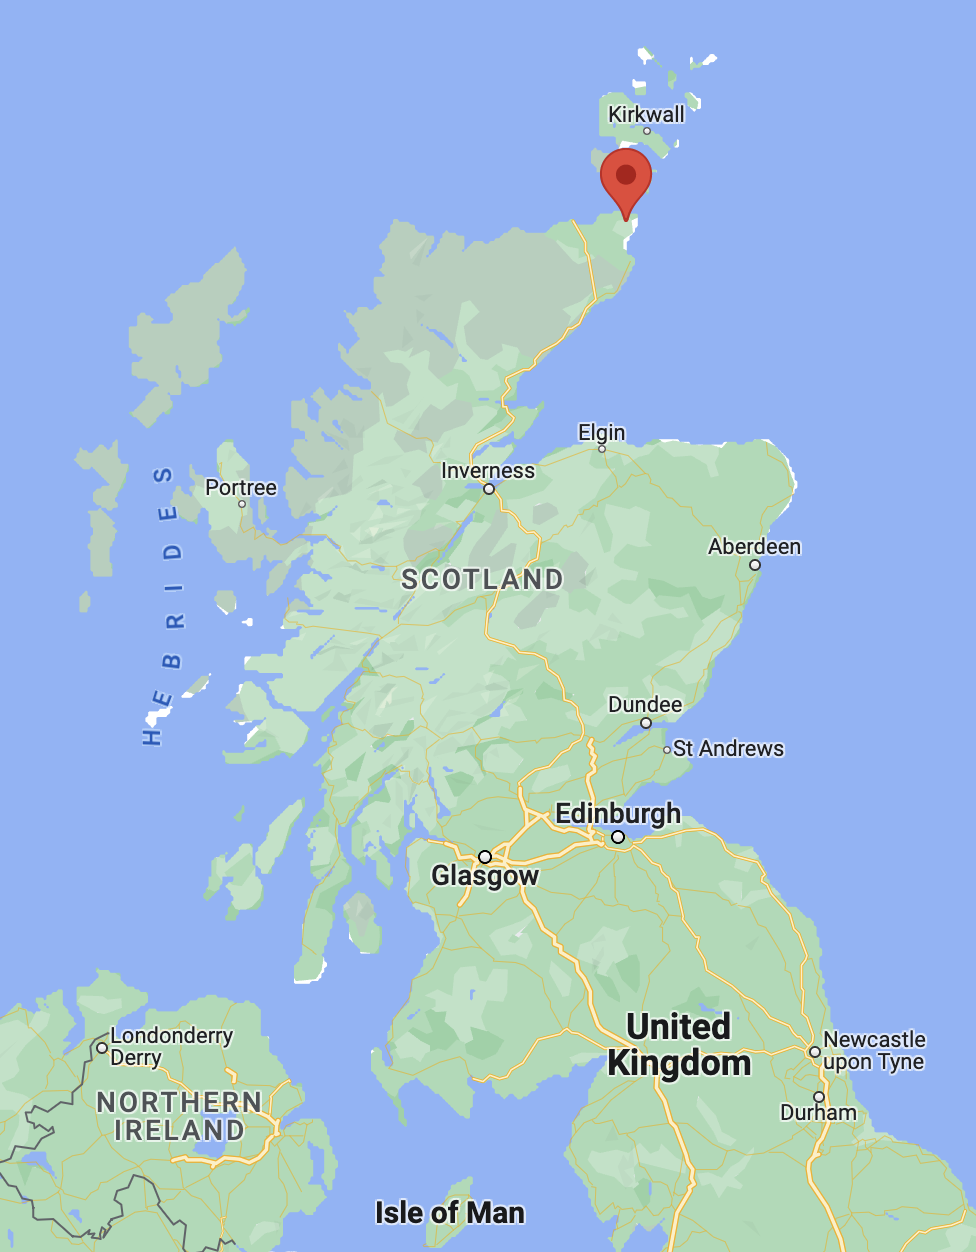

In [30]:
scotland_df

,time,i_lat,i_lon,ELUC,ELUC_diff,c3ann,c3ann_diff,c3nfx,c3nfx_diff,c3per,...,secdf,secdf_diff,secdn,secdn_diff,urban,urban_diff,mask,lat,lon,country
0,2008,58.625,-3.125,-0.011683,-0.143402,0.007852,-0.000081,0.000436,-4.480564e-06,0.0,...,0.123237,-0.007392,0.0,0.0,0.0,0.0,143.0,58.625,-3.125,143.0
502,2009,58.625,-3.125,-0.002630,0.009052,0.007739,-0.000113,0.000430,-6.267801e-06,0.0,...,0.145787,0.022550,0.0,0.0,0.0,0.0,143.0,58.625,-3.125,143.0
1004,2010,58.625,-3.125,-0.026520,-0.023890,0.007744,0.000005,0.000430,2.834422e-07,0.0,...,0.142617,-0.003170,0.0,0.0,0.0,0.0,143.0,58.625,-3.125,143.0
1506,2011,58.625,-3.125,-0.036655,-0.010136,0.008098,0.000353,0.000450,1.961304e-05,0.0,...,0.142109,-0.000508,0.0,0.0,0.0,0.0,143.0,58.625,-3.125,143.0
2008,2012,58.625,-3.125,-0.036396,0.000259,0.008380,0.000283,0.000466,1.571601e-05,0.0,...,0.145679,0.003570,0.0,0.0,0.0,0.0,143.0,58.625,-3.125,143.0
2510,2013,58.625,-3.125,-0.073086,-0.036690,0.008402,0.000021,0.000467,1.180131e-06,0.0,...,0.146506,0.000826,0.0,0.0,0.0,0.0,143.0,58.625,-3.125,143.0
3012,2014,58.625,-3.125,0.045319,0.118404,0.008007,-0.000395,0.000445,-2.193399e-05,0.0,...,0.156357,0.009852,0.0,0.0,0.0,0.0,143.0,58.625,-3.125,143.0
3514,2015,58.625,-3.125,0.031990,-0.013329,0.007920,-0.000087,0.000440,-4.840462e-06,0.0,...,0.144796,-0.011562,0.0,0.0,0.0,0.0,143.0,58.625,-3.125,143.0
4016,2016,58.625,-3.125,0.000309,-0.031681,0.008119,0.000200,0.000451,1.109226e-05,0.0,...,0.139412,-0.005384,0.0,0.0,0.0,0.0,143.0,58.625,-3.125,143.0
4518,2017,58.625,-3.125,-0.014927,-0.015236,0.008115,-0.000005,0.000451,-2.518937e-07,0.0,...,0.140559,0.001147,0.0,0.0,0.0,0.0,143.0,58.625,-3.125,143.0


<AxesSubplot: xlabel='time'>

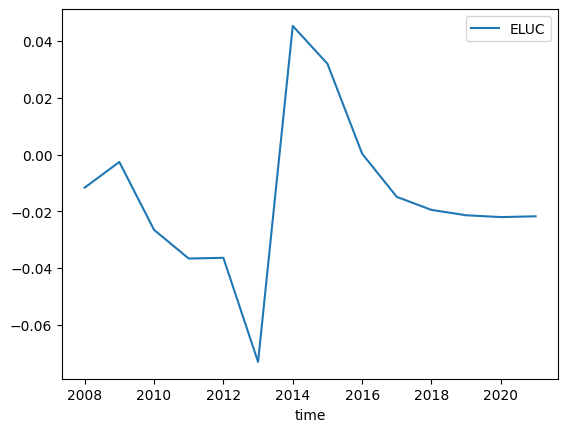

In [31]:
scotland_df[['ELUC', 'time']].plot(x="time", y="ELUC")

<AxesSubplot: xlabel='time'>

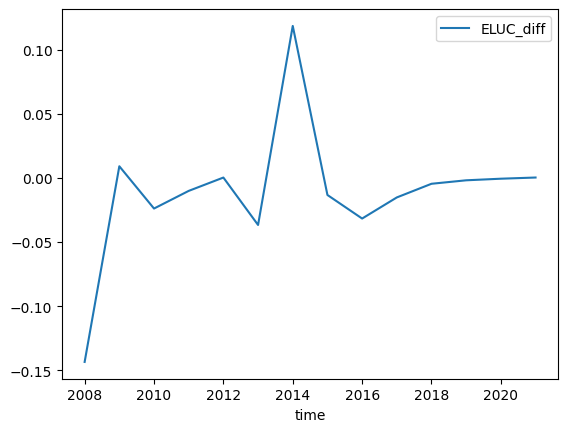

In [32]:
scotland_df[['ELUC_diff', 'time']].plot(x="time", y="ELUC_diff")

#### Why a "bump" in ELUC in 2014?
Looks like a bump, but just a very small change

In [33]:
def land_pie_plot(df, year, point_name):
    df[df.time == year][LAND_FEATURES].iloc[0].plot.pie(label=f"{point_name}, {year}")

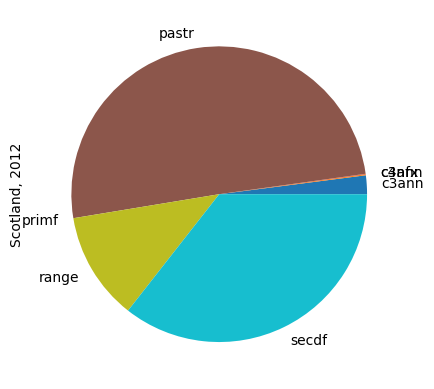

In [34]:
land_pie_plot(scotland_df, 2012, "Scotland")

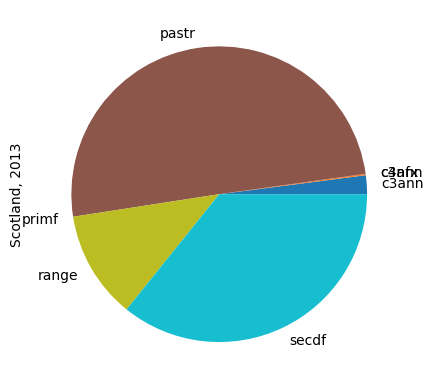

In [35]:
land_pie_plot(scotland_df, 2013, "Scotland")

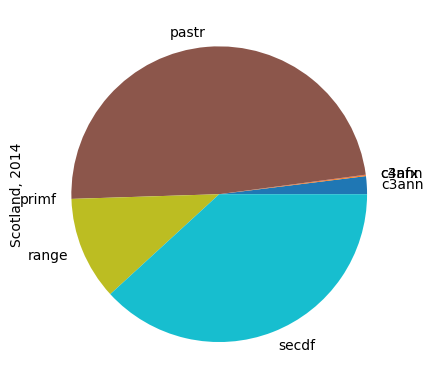

In [36]:
land_pie_plot(scotland_df, 2014, "Scotland")

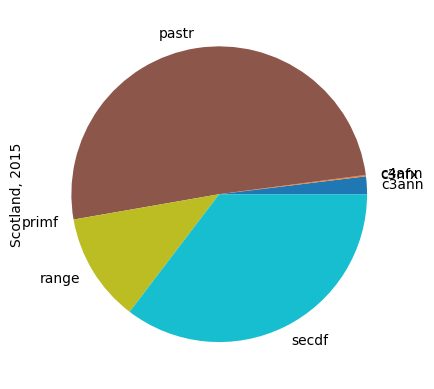

In [37]:
land_pie_plot(scotland_df, 2015, "Scotland")

In 2014 pasture diminished: it use to be half of the land use, but it drop below half in 2014. That should cause a drop in emissions. In 2015 pasture is back to half of land use. That should cause an increse in emissions. But we see a drop in 2013 and an increase in 2015. Are we off by one year?

### Sample #2: Wales
Choose a point that changes a lot

In [38]:
uk_recent_df["ELUC_diff"].max()

2.2187839

In [39]:
uk_recent_df[uk_recent_df.ELUC_diff == uk_recent_df["ELUC_diff"].max()]

,time,i_lat,i_lon,ELUC,ELUC_diff,c3ann,c3ann_diff,c3nfx,c3nfx_diff,c3per,...,secdf,secdf_diff,secdn,secdn_diff,urban,urban_diff,mask,lat,lon,country
2298,2012,52.875,-4.625,2.178015,2.218784,0.024427,0.000439,0.002316,0.000042,0.0,...,0.0,0.0,0.054846,0.000867,0.00095,-0.001416,143.0,52.875,-4.625,143.0


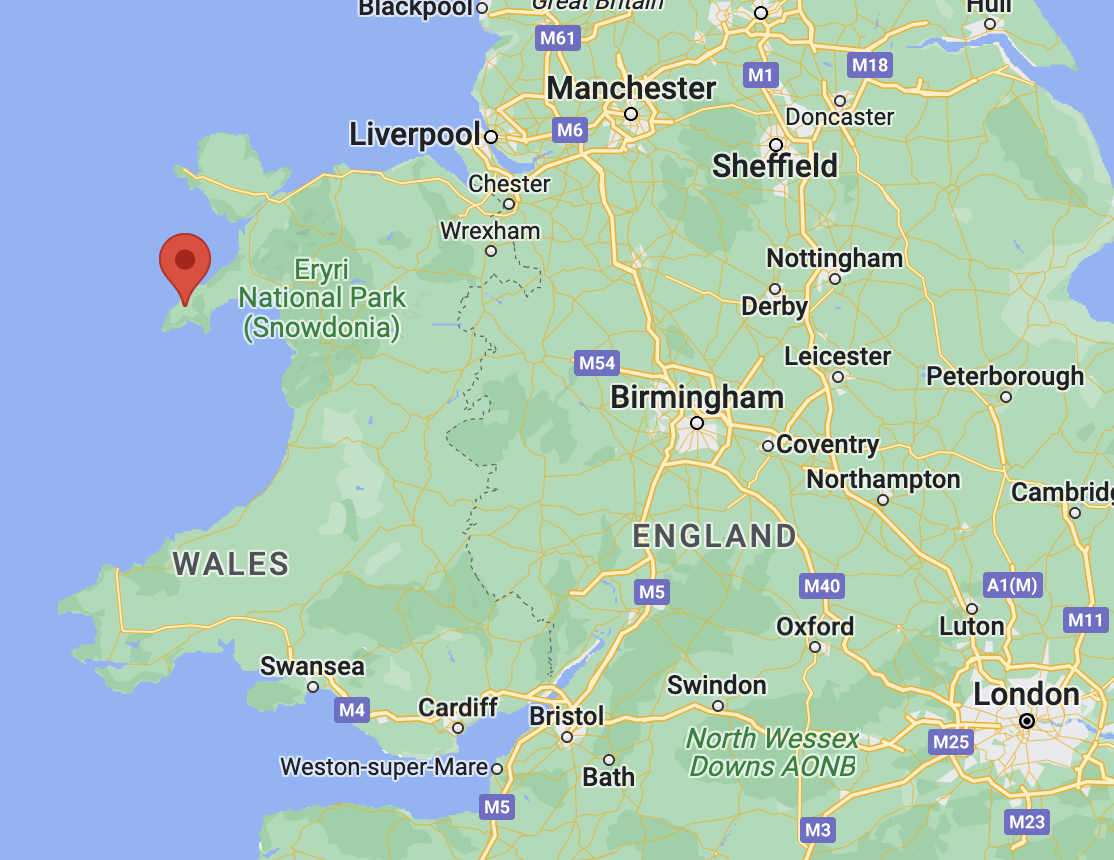

In [40]:
wales_df = uk_recent_df[(uk_recent_df.i_lat==52.875) & 
                        (uk_recent_df.i_lon==-4.625)]
wales_df

,time,i_lat,i_lon,ELUC,ELUC_diff,c3ann,c3ann_diff,c3nfx,c3nfx_diff,c3per,...,secdf,secdf_diff,secdn,secdn_diff,urban,urban_diff,mask,lat,lon,country
290,2008,52.875,-4.625,-0.017015,0.011003,0.024356,-0.000503,0.002310,-0.000048,0.0,...,0.0,0.0,0.051871,0.000546,0.003657,5.306210e-07,143.0,52.875,-4.625,143.0
792,2009,52.875,-4.625,-0.031517,-0.014502,0.024707,0.000352,0.002343,0.000033,0.0,...,0.0,0.0,0.051414,-0.000456,0.003658,3.275927e-07,143.0,52.875,-4.625,143.0
1294,2010,52.875,-4.625,-0.040686,-0.009169,0.024071,-0.000636,0.002283,-0.000060,0.0,...,0.0,0.0,0.052495,0.001081,0.003658,1.264270e-07,143.0,52.875,-4.625,143.0
1796,2011,52.875,-4.625,-0.040769,-0.000083,0.023987,-0.000084,0.002275,-0.000008,0.0,...,0.0,0.0,0.053979,0.001484,0.002367,-1.291211e-03,143.0,52.875,-4.625,143.0
2298,2012,52.875,-4.625,2.178015,2.218784,0.024427,0.000439,0.002316,0.000042,0.0,...,0.0,0.0,0.054846,0.000867,0.000950,-1.416252e-03,143.0,52.875,-4.625,143.0
2800,2013,52.875,-4.625,0.776525,-1.401490,0.024726,0.000299,0.002345,0.000028,0.0,...,0.0,0.0,0.052653,-0.002193,0.002817,1.867024e-03,143.0,52.875,-4.625,143.0
3302,2014,52.875,-4.625,0.464882,-0.311643,0.025278,0.000552,0.002397,0.000052,0.0,...,0.0,0.0,0.051217,-0.001436,0.002839,2.137152e-05,143.0,52.875,-4.625,143.0
3804,2015,52.875,-4.625,0.590692,0.125810,0.024040,-0.001237,0.002280,-0.000117,0.0,...,0.0,0.0,0.053029,0.001812,0.002860,2.140692e-05,143.0,52.875,-4.625,143.0
4306,2016,52.875,-4.625,0.422591,-0.168101,0.024092,0.000051,0.002285,0.000005,0.0,...,0.0,0.0,0.044713,-0.008316,0.002882,2.144184e-05,143.0,52.875,-4.625,143.0
4808,2017,52.875,-4.625,0.403619,-0.018972,0.024575,0.000483,0.002330,0.000046,0.0,...,0.0,0.0,0.043890,-0.000823,0.002903,2.147676e-05,143.0,52.875,-4.625,143.0


<AxesSubplot: xlabel='time'>

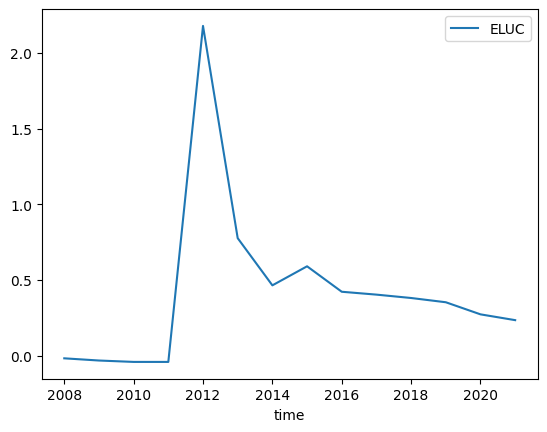

In [48]:
wales_df[['ELUC', 'time']].plot(x="time", y="ELUC")

<AxesSubplot: xlabel='time'>

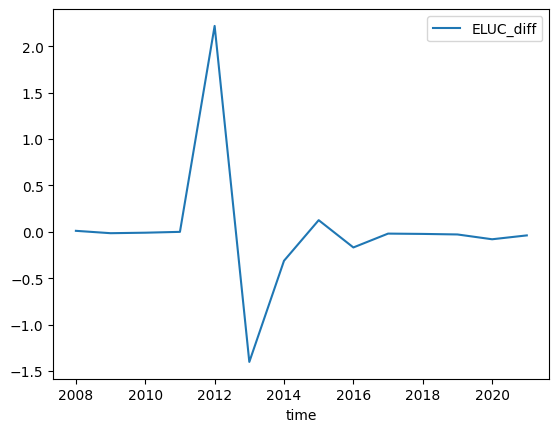

In [41]:
wales_df[['ELUC_diff', 'time']].plot(x="time", y="ELUC_diff")

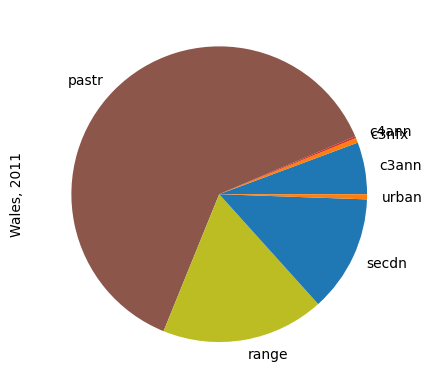

In [42]:
land_pie_plot(wales_df, 2011, "Wales")

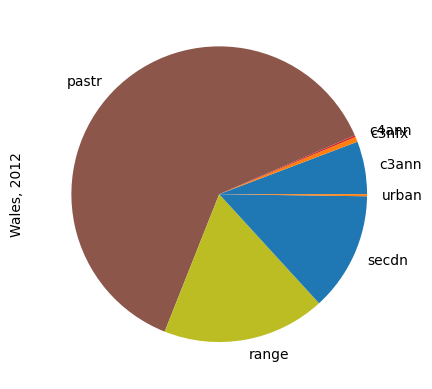

In [43]:
land_pie_plot(wales_df, 2012, "Wales")

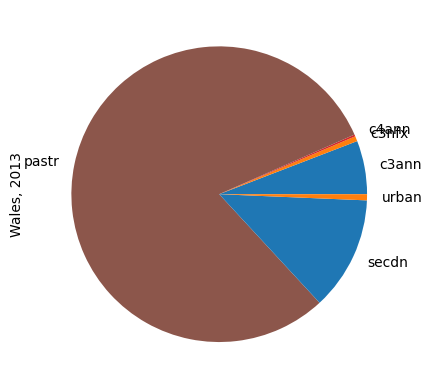

In [44]:
land_pie_plot(wales_df, 2013, "Wales")

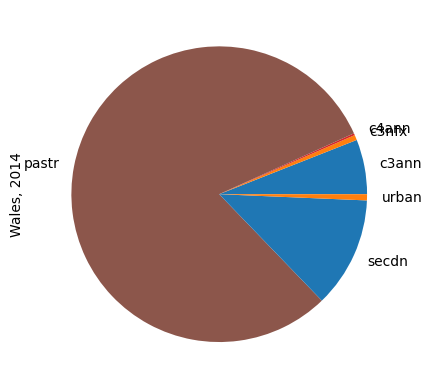

In [45]:
land_pie_plot(wales_df, 2014, "Wales")

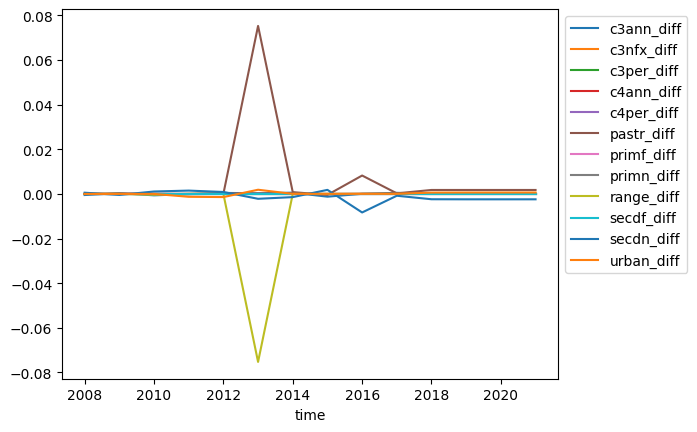

In [46]:
wales_df[["time"] + LAND_DIFF_FEATURES].plot(x='time')
plt.legend(bbox_to_anchor=(1.0, 1.0))

In [47]:
wales_df[["time", "ELUC"] + LAND_FEATURES]

,time,ELUC,c3ann,c3nfx,c3per,c4ann,c4per,pastr,primf,primn,range,secdf,secdn,urban
290,2008,-0.017015,0.024356,0.002310,0.0,0.000840,0.0,0.264010,0.0,0.0,7.563924e-02,0.0,0.051871,0.003657
792,2009,-0.031517,0.024707,0.002343,0.0,0.000852,0.0,0.264056,0.0,0.0,7.565243e-02,0.0,0.051414,0.003658
1294,2010,-0.040686,0.024071,0.002283,0.0,0.000830,0.0,0.264071,0.0,0.0,7.527474e-02,0.0,0.052495,0.003658
1796,2011,-0.040769,0.023987,0.002275,0.0,0.000827,0.0,0.263965,0.0,0.0,7.528347e-02,0.0,0.053979,0.002367
2298,2012,2.178015,0.024427,0.002316,0.0,0.000842,0.0,0.264005,0.0,0.0,7.529618e-02,0.0,0.054846,0.000950
2800,2013,0.776525,0.024726,0.002345,0.0,0.000853,0.0,0.339289,0.0,0.0,0.000000e+00,0.0,0.052653,0.002817
3302,2014,0.464882,0.025278,0.002397,0.0,0.000872,0.0,0.340080,0.0,0.0,0.000000e+00,0.0,0.051217,0.002839
3804,2015,0.590692,0.024040,0.002280,0.0,0.000829,0.0,0.339644,0.0,0.0,2.242955e-09,0.0,0.053029,0.002860
4306,2016,0.422591,0.024092,0.002285,0.0,0.000831,0.0,0.347881,0.0,0.0,0.000000e+00,0.0,0.044713,0.002882
4808,2017,0.403619,0.024575,0.002330,0.0,0.000847,0.0,0.348137,0.0,0.0,0.000000e+00,0.0,0.043890,0.002903


#### Why a bump in ELUC in 2012?
Is ELUC off by one?  
ELUC should be bigger for 2013, not for 2012.  
That could be explained by the change of `range` to `pasture` in 2013  
We should align the big "ELUC_diff" with the land use "diffs" at the year level

### Sample #3: Ireland (not UK)
Remove the max point and take next one

In [49]:
uk_recent_df[uk_recent_df.ELUC_diff != uk_recent_df["ELUC_diff"].max()]["ELUC_diff"].max()

1.2792225

In [50]:
uk_recent_df[uk_recent_df.ELUC_diff == 1.2792225]

,time,i_lat,i_lon,ELUC,ELUC_diff,c3ann,c3ann_diff,c3nfx,c3nfx_diff,c3per,...,secdf,secdf_diff,secdn,secdn_diff,urban,urban_diff,mask,lat,lon,country
3233,2014,54.125,-6.875,1.218279,1.279222,0.06143,-0.001665,0.0,0.0,0.0,...,0.139035,-0.004425,0.0,0.0,0.004863,0.000047,143.0,54.125,-6.875,143.0


Looks like Ireland to me, not UK, but... fine
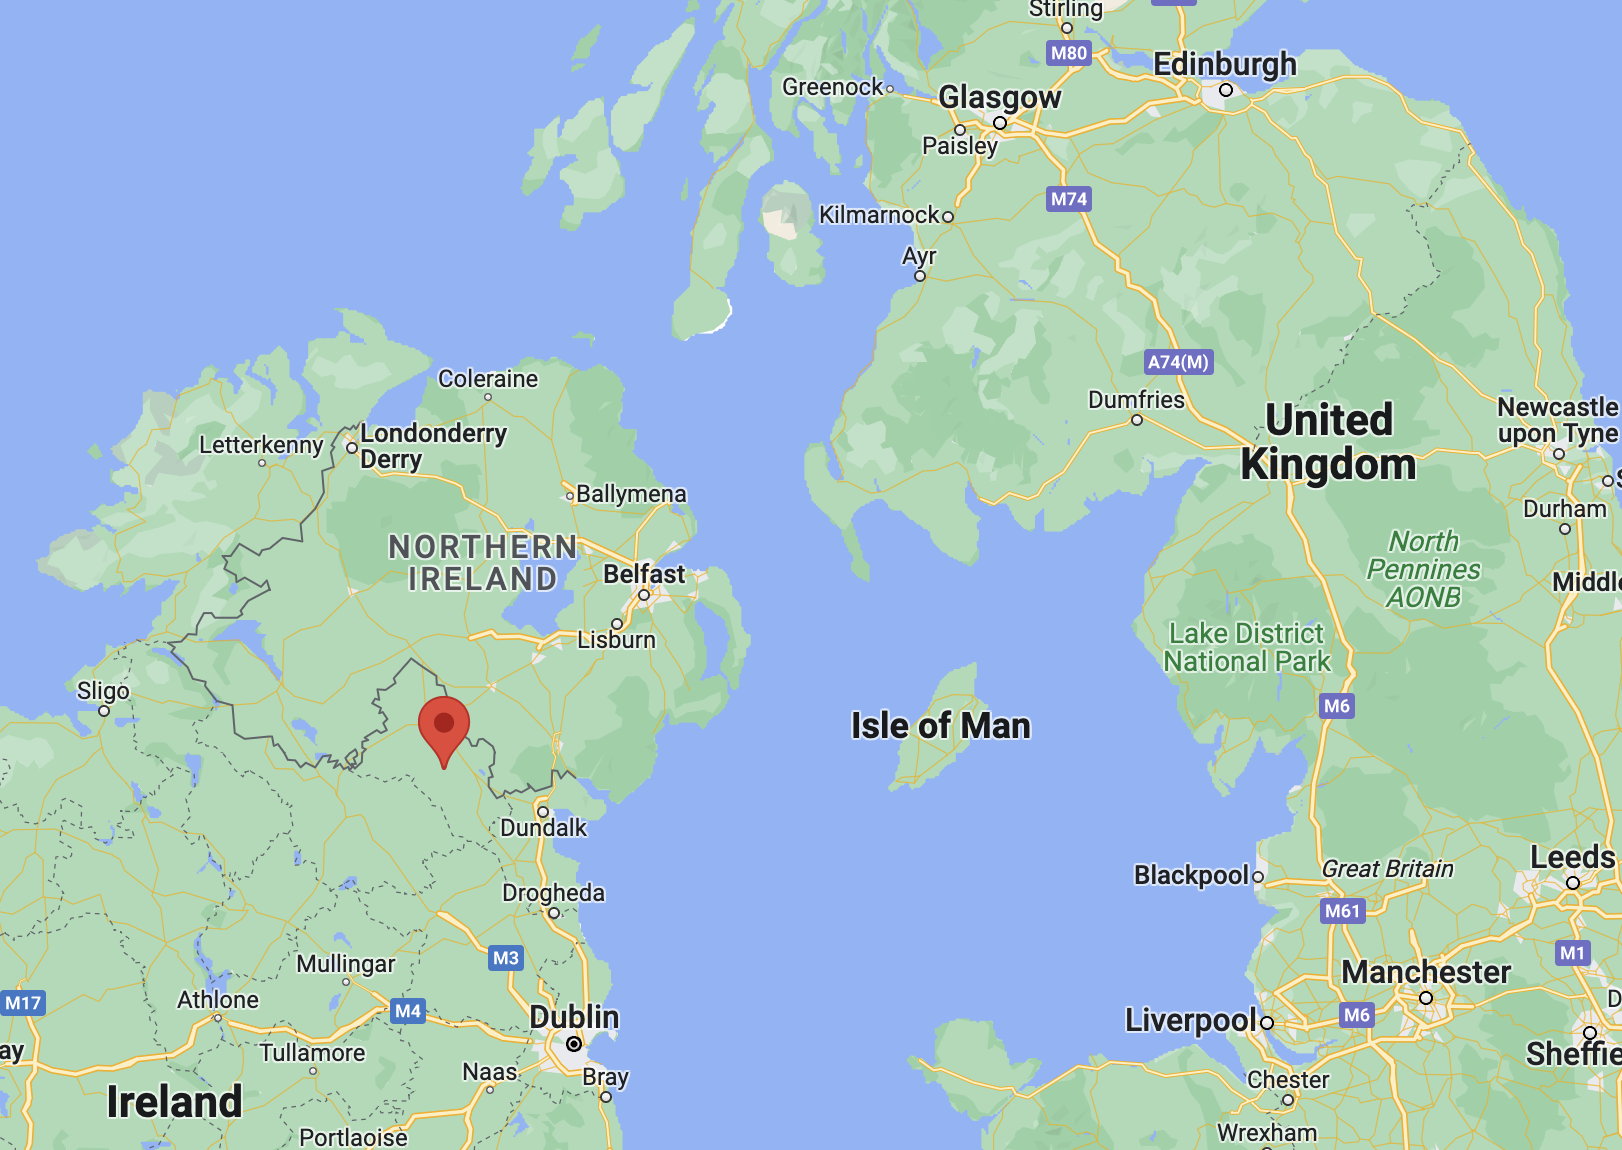

In [51]:
ireland_df = uk_recent_df[(uk_recent_df.i_lat==54.125) & 
                          (uk_recent_df.i_lon==-6.875)]
ireland_df

,time,i_lat,i_lon,ELUC,ELUC_diff,c3ann,c3ann_diff,c3nfx,c3nfx_diff,c3per,...,secdf,secdf_diff,secdn,secdn_diff,urban,urban_diff,mask,lat,lon,country
221,2008,54.125,-6.875,-0.463282,-0.064848,0.062375,0.001325,0.0,0.0,0.0,...,1.969586e-01,0.025410,0.0,0.0,3.651157e-03,2.703315e-04,143.0,54.125,-6.875,143.0
723,2009,54.125,-6.875,0.642097,1.105379,0.062291,-0.000084,0.0,0.0,0.0,...,2.071688e-01,0.010210,0.0,0.0,3.724965e-03,7.380778e-05,143.0,54.125,-6.875,143.0
1225,2010,54.125,-6.875,0.112930,-0.529167,0.058646,-0.003645,0.0,0.0,0.0,...,1.293541e-01,-0.077815,0.0,0.0,3.783071e-03,5.810615e-05,143.0,54.125,-6.875,143.0
1727,2011,54.125,-6.875,0.010435,-0.102495,0.059382,0.000737,0.0,0.0,0.0,...,1.285448e-01,-0.000809,0.0,0.0,4.408141e-03,6.250704e-04,143.0,54.125,-6.875,143.0
2229,2012,54.125,-6.875,-0.091311,-0.101746,0.065158,0.005775,0.0,0.0,0.0,...,1.326329e-01,0.004088,0.0,0.0,4.786854e-03,3.787125e-04,143.0,54.125,-6.875,143.0
2731,2013,54.125,-6.875,-0.060944,0.030367,0.063094,-0.002063,0.0,0.0,0.0,...,1.434609e-01,0.010828,0.0,0.0,4.815769e-03,2.891570e-05,143.0,54.125,-6.875,143.0
3233,2014,54.125,-6.875,1.218279,1.279222,0.061430,-0.001665,0.0,0.0,0.0,...,1.390354e-01,-0.004425,0.0,0.0,4.863168e-03,4.739873e-05,143.0,54.125,-6.875,143.0
3735,2015,54.125,-6.875,0.571047,-0.647232,0.035976,-0.025454,0.0,0.0,0.0,...,4.359588e-02,-0.095440,0.0,0.0,5.587583e-03,7.244148e-04,143.0,54.125,-6.875,143.0
4237,2016,54.125,-6.875,0.335928,-0.235119,0.035731,-0.000245,0.0,0.0,0.0,...,3.717426e-02,-0.006422,0.0,0.0,5.867099e-03,2.795160e-04,143.0,54.125,-6.875,143.0
4739,2017,54.125,-6.875,0.511244,0.175316,0.035945,0.000213,0.0,0.0,0.0,...,4.256897e-02,0.005395,0.0,0.0,5.923563e-03,5.646423e-05,143.0,54.125,-6.875,143.0


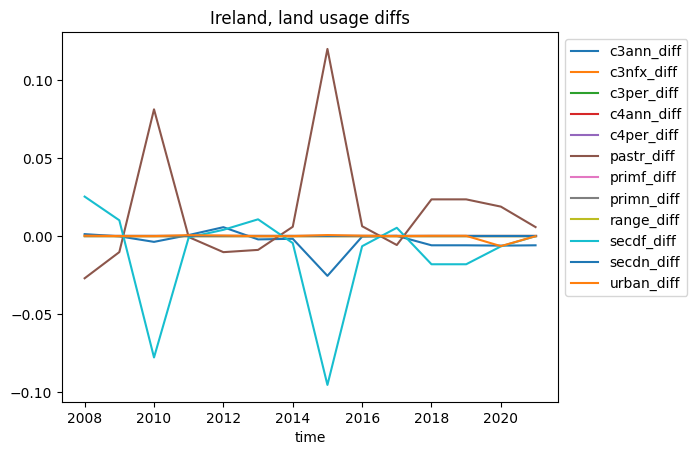

In [52]:
ireland_df[["time"] + LAND_DIFF_FEATURES].plot(x='time', title="Ireland, land usage diffs")
plt.legend(bbox_to_anchor=(1.0, 1.0))

<AxesSubplot: title={'center': 'Ireland, ELUC'}, xlabel='time'>

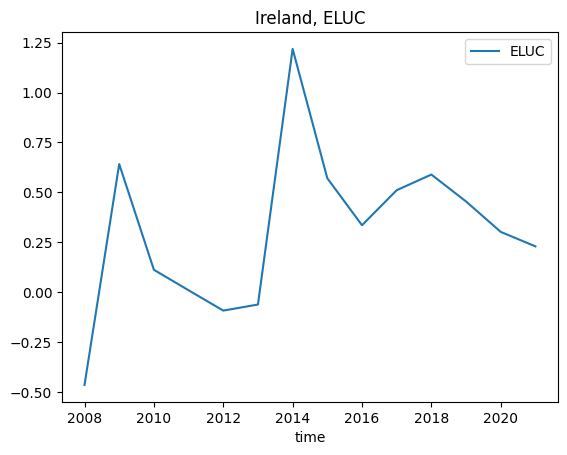

In [55]:
ireland_df[["time", "ELUC"]].plot(x='time', title="Ireland, ELUC")

<AxesSubplot: title={'center': 'Ireland, ELUC diff'}, xlabel='time'>

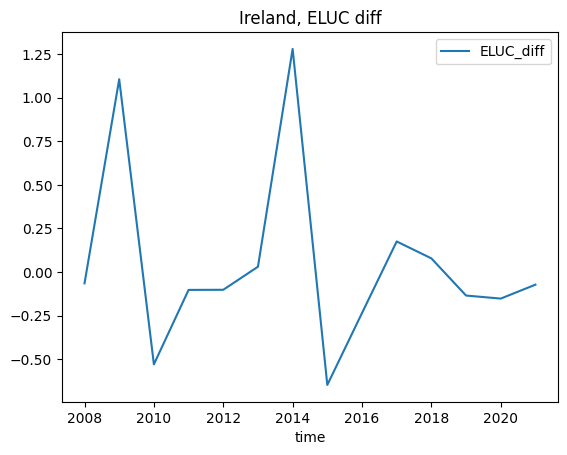

In [54]:
ireland_df[["time", "ELUC_diff"]].plot(x='time', title="Ireland, ELUC diff")

The big ELUC change is for 2014, but the spike in land usage diff is for 2015. Looks off by one.

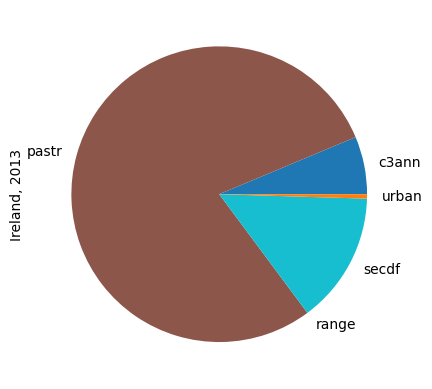

In [57]:
land_pie_plot(ireland_df, 2013, "Ireland")

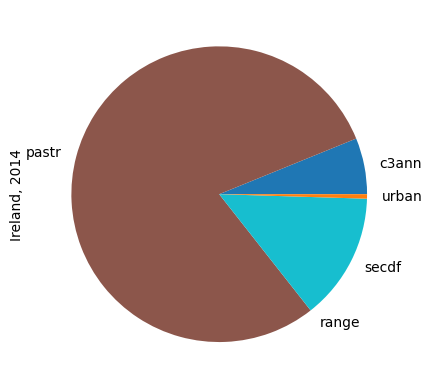

In [56]:
land_pie_plot(ireland_df, 2014, "Ireland")

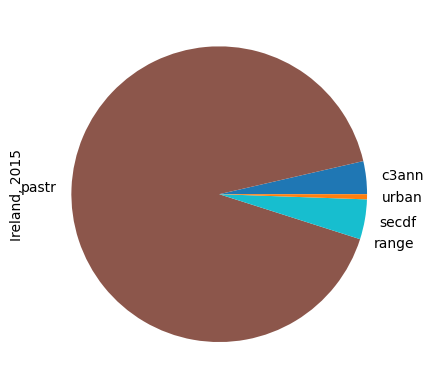

In [58]:
land_pie_plot(ireland_df, 2015, "Ireland")

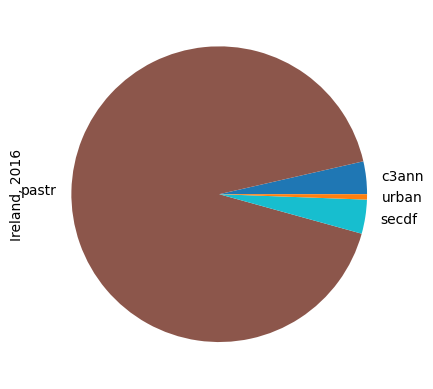

In [59]:
land_pie_plot(ireland_df, 2016, "Ireland")

In [60]:
ireland_df[["time", "pastr", "secdf"]]

,time,pastr,secdf
221,2008,0.737015,1.969586e-01
723,2009,0.726815,2.071688e-01
1225,2010,0.808217,1.293541e-01
1727,2011,0.807665,1.285448e-01
2229,2012,0.797423,1.326329e-01
2731,2013,0.788629,1.434609e-01
3233,2014,0.794672,1.390354e-01
3735,2015,0.914841,4.359588e-02
4237,2016,0.921227,3.717426e-02
4739,2017,0.915563,4.256897e-02


In [66]:
round(3.717426e-02, 4)

0.0372